In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()


In [4]:
# Step 2: Load the original and synthetic datasets
# Adjust file paths if needed
original_data = pd.read_csv('final_dataset.csv')  # Replace with actual path if different
synthetic_data = pd.read_csv('synthetic_data.csv')  # Replace with actual path if different

# Separate features and labels
X_original = original_data.drop('Type', axis=1)  # Replace 'label' with the actual label column name if different
y_original = original_data['Type']

X_synthetic = synthetic_data.drop('label', axis=1)  # Replace 'label' if needed
y_synthetic = synthetic_data['label']


In [5]:
# Step 3: Split original data into train and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

# Step 4: Split synthetic data into train and test sets
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(
    X_synthetic, y_synthetic, test_size=0.2, random_state=42
)


Validation Results - Trained on Synthetic Data, Tested on Synthetic Data
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4014
           1       1.00      1.00      1.00      3986

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Confusion Matrix:
 [[4014    0]
 [   0 3986]]


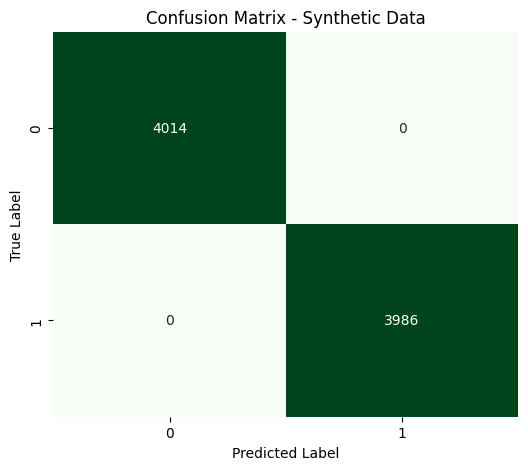

In [6]:
# Step 5: Train a classifier on the synthetic training data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_synth, y_train_synth)

# Step 6: Test the classifier on the synthetic test data
y_pred_synth = classifier.predict(X_test_synth)

# Step 7: Evaluate the model's performance
accuracy_synth = accuracy_score(y_test_synth, y_pred_synth)
print("Validation Results - Trained on Synthetic Data, Tested on Synthetic Data")
print("Accuracy:", accuracy_synth)
print("Classification Report:\n", classification_report(y_test_synth, y_pred_synth))
cm_synth = confusion_matrix(y_test_synth, y_pred_synth)
print("Confusion Matrix:\n", cm_synth)

# Step 8: Plot the confusion matrix
plot_confusion_matrix(cm_synth, title="Confusion Matrix - Synthetic Data")

In [7]:
# Step 9: Create a DataFrame with the synthetic test features, actual labels, and predicted labels
synthetic_test_results = X_test_synth.copy()  # Start with the test features
synthetic_test_results['Actual_Label'] = y_test_synth.values  # Add actual labels as a column
synthetic_test_results['Predicted_Label'] = y_pred_synth  # Add predicted labels as a column

# Step 10: Save the results to a CSV file
synthetic_test_results.to_csv('synthetic_test_results.csv', index=False)
print("Synthetic test data with actual and predicted labels saved to 'synthetic_test_results.csv'")


Synthetic test data with actual and predicted labels saved to 'synthetic_test_results.csv'


Validation Results - Trained on Synthetic Data, Tested on Original Data
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7636
           1       1.00      1.00      1.00      7985

    accuracy                           1.00     15621
   macro avg       1.00      1.00      1.00     15621
weighted avg       1.00      1.00      1.00     15621

Confusion Matrix:
 [[7636    0]
 [   0 7985]]


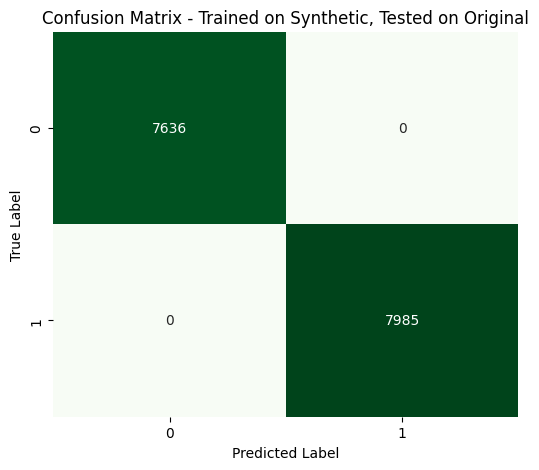

In [8]:
# Step 5: Train on synthetic data and test on original data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_synth, y_train_synth)
y_pred_orig = classifier.predict(X_test_orig)

# Step 6: Evaluate the performance on original data
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print("Validation Results - Trained on Synthetic Data, Tested on Original Data")
print("Accuracy:", accuracy_orig)
print("Classification Report:\n", classification_report(y_test_orig, y_pred_orig))
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
print("Confusion Matrix:\n", cm_orig)
plot_confusion_matrix(cm_orig, title="Confusion Matrix - Trained on Synthetic, Tested on Original")



Validation Results - Trained on Original Data, Tested on Synthetic Data
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       201

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix:
 [[199   0]
 [  0 201]]


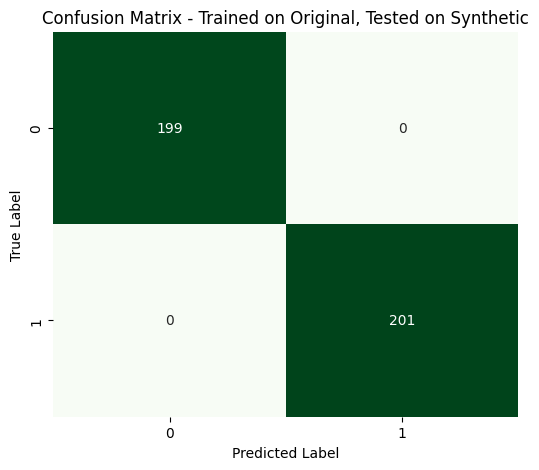

In [15]:
# Step 7: Train on original data and test on synthetic data
classifier.fit(X_train_orig, y_train_orig)
y_pred_synth = classifier.predict(X_test_synth)

# Step 8: Evaluate the performance on synthetic data
accuracy_synth = accuracy_score(y_test_synth, y_pred_synth)
print("\nValidation Results - Trained on Original Data, Tested on Synthetic Data")
print("Accuracy:", accuracy_synth)
print("Classification Report:\n", classification_report(y_test_synth, y_pred_synth))
cm_synth = confusion_matrix(y_test_synth, y_pred_synth)
print("Confusion Matrix:\n", cm_synth)
plot_confusion_matrix(cm_synth, title="Confusion Matrix - Trained on Original, Tested on Synthetic")


In [16]:
# Print Overall Accuracy for CWGAN model
print(f"\nOverall CWGAN Model Accuracy (average): {(accuracy_orig + accuracy_synth) / 2:.4f}")


Overall CWGAN Model Accuracy (average): 1.0000
